# Curvas de ROC

Toy example:

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Vamos utilizar dados gerados (saídas e probabilidadeS)

In [ ]:
y = np.array([1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2])
scores = np.array([0.1, 0.1, 0.2, 0.3, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
roc_auc = roc_auc_score(y, scores)
print("AUC: {}".format(roc_auc))

AUC: 0.7857142857142858


Agora vamos plotar a curva de ROC

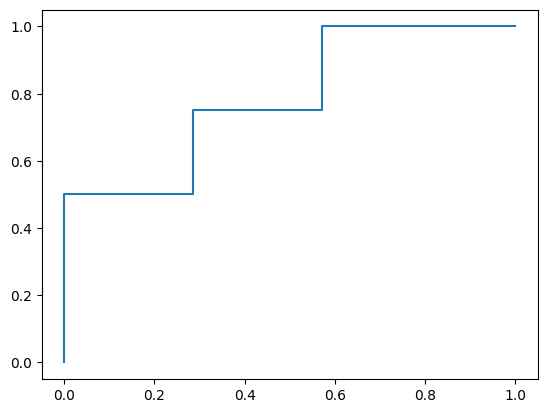

In [ ]:
plt.figure()
plt.plot(fpr, tpr)

## Um Exemplo com dados reais

Seção contendo os imports necessários

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Vamos gerar um problema de classificação com 5 características e 2 classes

In [ ]:
# generate 2 class dataset
X, Y = make_classification(n_samples=1000, n_features=5, n_classes=2,
                           random_state=1)

Inspecionando o dataset gerado:

In [ ]:
X[:5]

array([[-1.39087601,  0.62478042,  3.4809096 ,  2.3823372 ,  0.38622388],
       [-0.48529475,  0.30051483,  1.33915253,  0.84620081,  1.17745439],
       [-0.73504687,  0.13412273,  1.54350554,  1.22343943, -0.62879943],
       [ 0.6594484 ,  1.47747999,  1.0281535 , -0.80770875, -0.34350003],
       [ 0.17288184,  0.99271923,  1.18375139, -0.10191134,  0.08911753]])

In [ ]:
Y[:10]

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0])

Agora vamos separar os dados em **treino** e **teste**:

In [ ]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.5,
                                                random_state=2)

e treinar o nosso Regressor Logístico utilizando a classe `LogisticRegression` do scikit-learn

In [ ]:
# fit a model
model = LogisticRegression()
model.fit(trainX, trainY)

LogisticRegression()

Agora vamos avaliar a qualidade do nosso modelo utilizando a partição de **teste**

In [ ]:
pred_prob = model.predict_proba(testX)

Vamos manter somente o resultado positivo -> o exemplo pertence a classe `1`

In [ ]:
pred_prob = pred_prob[:,1]

Agora calculamos o score AUC:

In [ ]:
auc = roc_auc_score(testY, pred_prob)
print("AUC score: {:.3f}".format(auc))

AUC score: 0.934


Vamos calcular os parâmetros necessários para plotar a curva de ROC:

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(testY,
                                                                pred_prob)

Agora vamos plotar a curva:

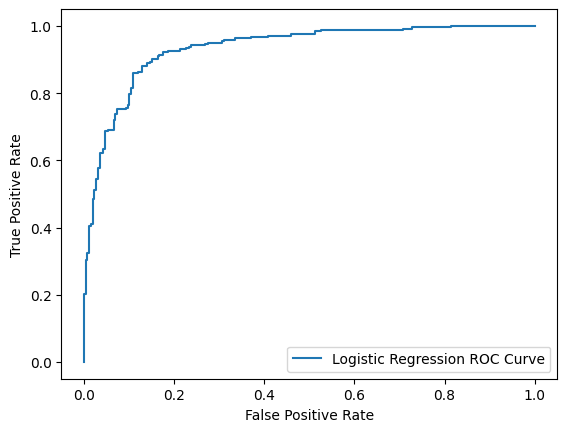

In [ ]:
pyplot.plot(false_positive_rate, true_positive_rate,
            label='Logistic Regression ROC Curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Exercício

O conjunto de dados está disponível publicamente no Kaggle e é proveniente de um estudo cardiovascular em curso sobre residentes da cidade de Framingham, Massachusetts. O objetivo da classificação é prever se o doente tem um risco de 10 anos de futura doença coronária (CHD). O conjunto de dados fornece as informações dos doentes. Inclui mais de 4.000 registos e 15 atributos.

Cada atributo é um potencial factor de risco. Existem factores de risco demográficos, comportamentais e médicos.

### Download and read the data:

In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1yHNFuQkro58eBbcfy27aM4IwcGUwHtpO

Downloading...
From: https://drive.google.com/uc?id=1yHNFuQkro58eBbcfy27aM4IwcGUwHtpO
To: /content/framingham.csv
100% 196k/196k [00:00<00:00, 112MB/s]


In [ ]:
!head -10 framingham.csv

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,39,4,0,0,0,0,0,0,195,106,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130,84,23.1,85,85,0
0,43,2,0,0,0,0,1,0,228,180,110,30.3,77,99,0
0,63,1,0,0,0,0,0,0,205,138,71,33.11,60,85,1
0,45,2,1,20,0,0,0,0,313,100,71,21.68,79,78,0
1,52,1,0,0,0,0,1,0,260,141.5,89,26.36,76,79,0


Read the data using Pandas

In [ ]:
import pandas as pd

In [ ]:
heart_df=pd.read_csv("framingham.csv")

In [ ]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Tarefas

1.Explore os dados e crie um classificador de Regressão Logística para prever a variável `TenYearCHD`.
1. Experimente uma combinação de variáveis para construir o melhor classificador.
1. Construir curvas ROC e calcular a AUC para comparar os classificadores.
1. Comparar com os classificadores `SVM` e `KNN`